In [1]:
#yolov8

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Documents/img-det-benchmark/confidence_scores/detections_v8_ny.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v8_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_v8_df)

           Object  Confidence
0        backpack    0.521412
1           bench    0.338022
2         bicycle    0.406199
3             bus    0.323457
4             car    0.892972
5             cow    0.341358
6             cup    0.287527
7             dog    0.736612
8    fire hydrant    0.436046
9         handbag    0.756309
10         person    0.881384
11   potted plant    0.260420
12     skateboard    0.336377
13       suitcase    0.306144
14  traffic light    0.307285
15       umbrella    0.538258


In [3]:
#yolov5

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Documents/img-det-benchmark/confidence_scores/detections_v5_ny.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v5_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_v5_df)

           Object  Confidence
0        backpack    0.536388
1         bicycle    0.401599
2            bowl    0.272218
3             car    0.889854
4             cup    0.320650
5             dog    0.741563
6    fire hydrant    0.267291
7         handbag    0.714109
8          person    0.862429
9   traffic light    0.311751
10       umbrella    0.468805


In [4]:
#yolov3

import pandas as pd

# Replace the path with your actual file path
file_path = '/Users/rupakraut/Documents/img-det-benchmark/confidence_scores/detections_v3_ny.csv'

# Load the CSV file into a DataFrame
detections_df = pd.read_csv(file_path)

unique_detections_df = detections_df.groupby(['Frame', 'Object']).first().reset_index()

# If you want to see the first 20 rows of the unique detections
mean_confidence_v3_df = unique_detections_df.groupby('Object')['Confidence'].mean().reset_index()

# Display the mean confidence for each object
print(mean_confidence_v3_df)

           Object  Confidence
0        backpack    0.471270
1         bicycle    0.387260
2             bus    0.268416
3             car    0.894572
4             dog    0.677300
5         handbag    0.663276
6      motorcycle    0.539849
7          person    0.861762
8        suitcase    0.355927
9   traffic light    0.306161
10       umbrella    0.544211


In [8]:
import pandas as pd

df1 = mean_confidence_v8_df
df2 = mean_confidence_v5_df
df3 = mean_confidence_v3_df

# Identify unique objects across all dataframes
unique_objects = pd.unique(df1['Object'].tolist() + df2['Object'].tolist() + df3['Object'].tolist())

# Create a new dataframe with unique objects
combined_df = pd.DataFrame(unique_objects, columns=['Object'])

# Merge the original dataframes with the new dataframe
combined_df = combined_df.merge(df1, on='Object', how='left').rename(columns={'Confidence': 'Confidence_1'})
combined_df = combined_df.merge(df2, on='Object', how='left').rename(columns={'Confidence': 'Confidence_2'})
combined_df = combined_df.merge(df3, on='Object', how='left').rename(columns={'Confidence': 'Confidence_3'})
combined_df = combined_df.fillna(0)

# Now combined_df has one column for objects and three columns for confidences


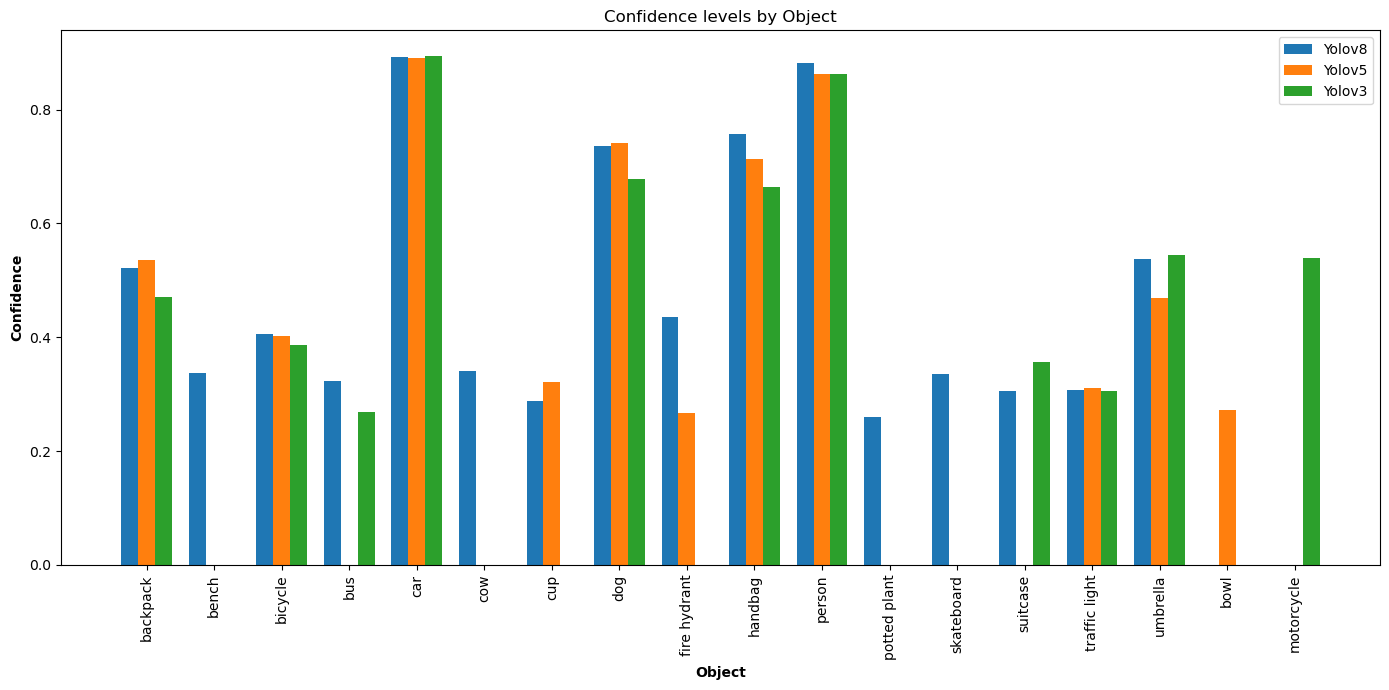

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better readability
plt.figure(figsize=(14, 7))

# Define the width of the bars
bar_width = 0.25

# Get the positions of the bars on the x-axis
index = np.arange(len(combined_df))

# Plotting the bars for each confidence
plt.bar(index, combined_df['Confidence_1'], width=bar_width, label='Yolov8')
plt.bar(index + bar_width, combined_df['Confidence_2'], width=bar_width, label='Yolov5')
plt.bar(index + 2*bar_width, combined_df['Confidence_3'], width=bar_width, label='Yolov3')

# Add labels to the x-axis for each group of bars
plt.xlabel('Object', fontweight='bold')
plt.xticks(index + bar_width, combined_df['Object'], rotation=90)

# Add labels and title
plt.ylabel('Confidence', fontweight='bold')
plt.title('Confidence levels by Object')

# Create a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()
